# Test ZARR performance for CAB-LAB data cubes

In [30]:
import xarray as xr
import zarr
from esdl import Cube

In [31]:
# Open cube version 1.0, ~60 GB
cube = Cube.open('C:\\Users\\Norman\\EOData\\cablab-datacube-1.0.0\\low-res')

In [32]:
# Convert to xarray dataset --> takes up tp 30 seconds
ds = cube.data.dataset()

C:\Users\Norman\.conda\envs\esdl\lib\site-packages\xarray\core\dataset.py:373: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  both_data_and_coords = [k for k in data_vars if k in coords]


In [9]:
ds

<xarray.Dataset>
Dimensions:                            (bnds: 2, lat: 720, lon: 1440, time: 506)
Coordinates:
  * time                               (time) datetime64[ns] 2001-01-05 ...
  * lon                                (lon) float32 -179.875 -179.625 ...
    lon_bnds                           (lon, bnds) float32 dask.array<shape=(1440, 2), chunksize=(1440, 2)>
    lat_bnds                           (lat, bnds) float32 dask.array<shape=(720, 2), chunksize=(720, 2)>
  * lat                                (lat) float32 89.875 89.625 89.375 ...
    time_bnds                          (time, bnds) datetime64[ns] dask.array<shape=(506, 2), chunksize=(46, 2)>
Dimensions without coordinates: bnds
Data variables:
    aerosol_optical_thickness_1610     (time, lat, lon) float32 dask.array<shape=(506, 720, 1440), chunksize=(92, 720, 1440)>
    aerosol_optical_thickness_550      (time, lat, lon) float32 dask.array<shape=(506, 720, 1440), chunksize=(92, 720, 1440)>
    aerosol_optical_thicknes

In [5]:
ds.precipitation.sel(time='2010-01-01', method='nearest').plot(vmax=10)

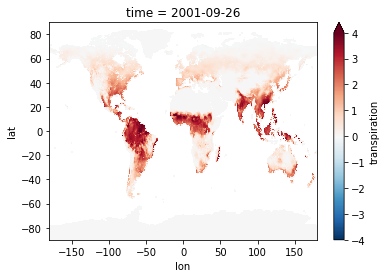

In [10]:
ds.transpiration.isel(time=33).plot(vmax=4)

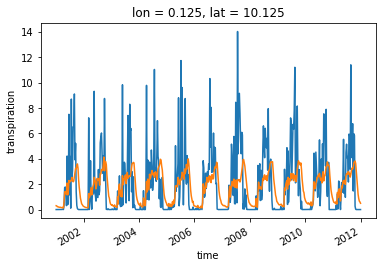

In [11]:
ds.precipitation.sel(lat=10., lon=0., method='nearest').plot()
ds.transpiration.sel(lat=10., lon=0., method='nearest').plot()

In [12]:
ds.time

<xarray.DataArray 'time' (time: 506)>
array(['2001-01-05T00:00:00.000000000', '2001-01-13T00:00:00.000000000',
       '2001-01-21T00:00:00.000000000', ..., '2011-12-15T00:00:00.000000000',
       '2011-12-23T00:00:00.000000000', '2011-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2001-01-05 2001-01-13 2001-01-21 ...
Attributes:
    long_name:      time
    standard_name:  time
    bounds:         time_bnds

In [14]:
%timeit -r 1 -n 1 print(float((ds.precipitation * ds.transpiration).mean()))

1.5243369340896606
14.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [37]:
# # Rechunk: force all variables to have the same chunk size
ds = xr.Dataset({var: ds[var].chunk((46, 720, 1440)) for var in ds.data_vars})
# Write to ZARR directory
ds.to_zarr('cube.zarr')

In [33]:
import xarray as xr

In [38]:
ds1 = xr.open_zarr('cube.zarr')

In [39]:
ds1

<xarray.Dataset>
Dimensions:                            (lat: 720, lon: 1440, time: 506)
Coordinates:
  * lat                                (lat) float32 89.875 89.625 89.375 ...
  * lon                                (lon) float32 -179.875 -179.625 ...
  * time                               (time) datetime64[ns] 2001-01-05 ...
Data variables:
    aerosol_optical_thickness_1610     (time, lat, lon) float32 dask.array<shape=(506, 720, 1440), chunksize=(46, 720, 1440)>
    aerosol_optical_thickness_550      (time, lat, lon) float32 dask.array<shape=(506, 720, 1440), chunksize=(46, 720, 1440)>
    aerosol_optical_thickness_555      (time, lat, lon) float32 dask.array<shape=(506, 720, 1440), chunksize=(46, 720, 1440)>
    aerosol_optical_thickness_659      (time, lat, lon) float32 dask.array<shape=(506, 720, 1440), chunksize=(46, 720, 1440)>
    aerosol_optical_thickness_865      (time, lat, lon) float32 dask.array<shape=(506, 720, 1440), chunksize=(46, 720, 1440)>
    air_temperature_2m 

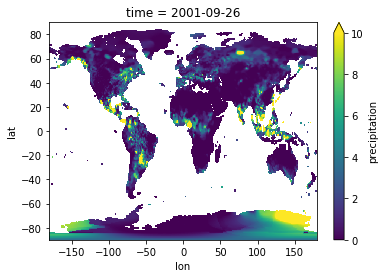

In [19]:
ds1.precipitation.isel(time=33).plot(vmax=10)

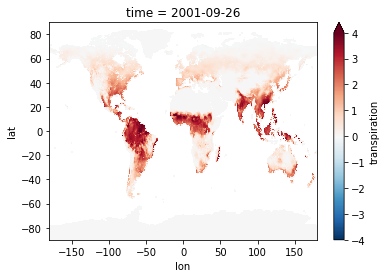

In [40]:
ds1.transpiration.isel(time=33).plot(vmax=4)

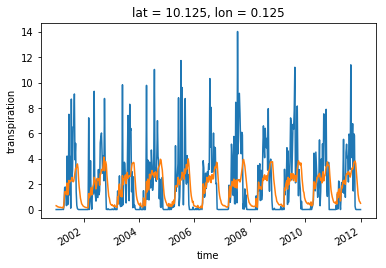

In [41]:
ds1.precipitation.sel(lat=10., lon=0., method='nearest').plot()
ds1.transpiration.sel(lat=10., lon=0., method='nearest').plot()

In [42]:
%timeit -r 1 -n 1 print(float((ds1.precipitation * ds1.transpiration).mean()))

1.5243369340896606
11.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [43]:
# # Save as ZARR ZIP archive
# store = zarr.ZipStore('cube.zarr.zip', mode='w')
# ds1.to_zarr(store=store, group='bibo')
# store.close()

In [44]:
store = zarr.ZipStore('cube.zarr.zip', mode='r')
ds2 = xr.open_zarr(store=store, group='bibo')

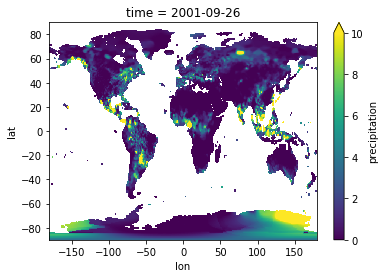

In [45]:
ds2.precipitation.isel(time=33).plot(vmax=10)

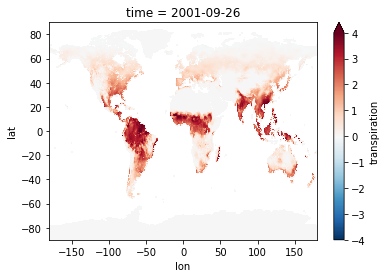

In [46]:
ds2.transpiration.isel(time=33).plot(vmax=4)

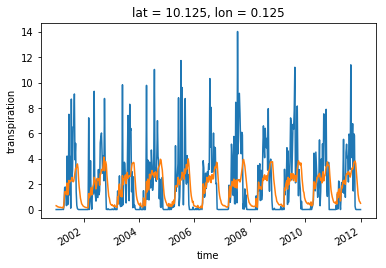

In [47]:
ds2.precipitation.sel(lat=10., lon=0., method='nearest').plot()
ds2.transpiration.sel(lat=10., lon=0., method='nearest').plot()

In [ ]:
%timeit -r 1 -n 1 print(float((ds2.precipitation * ds2.transpiration).mean()))

In [ ]:
store.close()

In [24]:
(506 * 720 * 1440)

524620800